<a href="https://colab.research.google.com/github/A-zanke/A-B-testing-Analysis-project/blob/main/A_B_Testing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Randomize and Assign
# Simulate data for control and treatment groups
np.random.seed(42)  # For reproducibility
control_group = np.random.binomial(n=1, p=0.2, size=1000)  # Control group with a 20% click-through rate
treatment_group = np.random.binomial(n=1, p=0.12, size=1000)  # Treatment group with a 12% click-through rate



In [20]:
# Create a DataFrame for easier handling
data = pd.DataFrame({
    'group': ['control'] * 1000 + ['treatment'] * 1000,
    'click': np.concatenate([control_group, treatment_group])
})



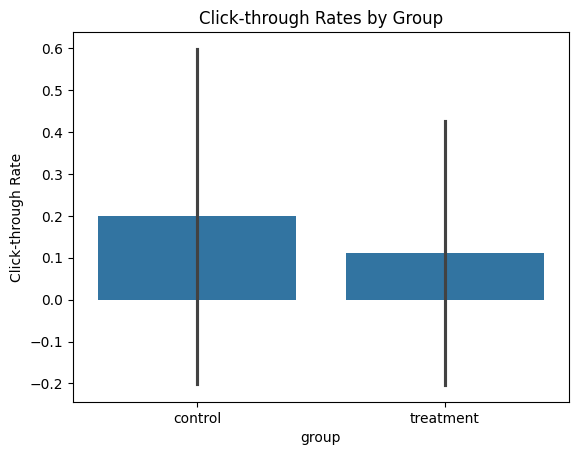

In [29]:
# Exploratory Data Analysis (EDA)
# Visualize the click-through rates
sns.barplot(x='group', y='click', data=data, errorbar='sd')
plt.title('Click-through Rates by Group')
plt.ylabel('Click-through Rate')
plt.show()



In [22]:
# Calculate summary statistics
summary_stats = data.groupby('group')['click'].agg(['mean', 'std', 'count']).reset_index()
print(summary_stats)



       group   mean       std  count
0    control  0.199  0.399448   1000
1  treatment  0.112  0.315524   1000


In [23]:
# Statistical Analysis
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(control_group, treatment_group)

# Print t-test results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")



T-statistic: 5.404726447510271
P-value: 7.266491408808736e-08


In [24]:
# Interpret Results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the groups.")



Reject null hypothesis: There is a significant difference between the groups.


In [25]:
# Make Recommendations
if np.mean(treatment_group) > np.mean(control_group):
    recommendation = "The treatment group has a higher click-through rate than the control group.\nRecommendation: Implement the new ad design."
else:
    recommendation = "The treatment group does not have a higher click-through rate than the control group.\nRecommendation: Stick with the current ad design."

print(recommendation)



The treatment group does not have a higher click-through rate than the control group.
Recommendation: Stick with the current ad design.


In [26]:
# Additional Analysis: Effect Size
# Calculate Cohen's d for practical significance
mean_diff = np.mean(treatment_group) - np.mean(control_group)
pooled_std = np.sqrt((np.std(control_group, ddof=1) ** 2 + np.std(treatment_group, ddof=1) ** 2) / 2)
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d}")



Cohen's d: -0.24170671472847832


In [27]:
# Practical significance interpretation
if cohens_d > 0.2:
    print("The effect size is small but practically significant.")
elif cohens_d > 0.5:
    print("The effect size is medium and practically significant.")
elif cohens_d > 0.8:
    print("The effect size is large and practically significant.")
else:
    print("The effect size is negligible.")


The effect size is negligible.
